<a href="https://colab.research.google.com/github/esyakov/low-code-book-projects/blob/notebooks/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA Section - Use AutoML to Predict Advertising Media Channel Sales**
# Introduction
Our use case is to predict advertising media channel sales using AutoML. Since we are using AutoML, there is no need to write code to do this. However, as a best practice, we should explore our data.

# Dataset
The dataset being used for this chapter, the advertising_2023 dataset, is based on data taken from An Introduction to Statistical Learning with Applications in R by Daniela Witten, Gareth M. James, Trevor Hastie, and Robert Tibshirani (Springer, 2021). The advertising dataset captures the sales revenue generated from advertising (in thousands of units) for particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

For this book, the dataset has been updated to include a digital variable and modified to show the impact of digital budgets on sales. The number of markets has been increased from 200 to 1,200. Thus, the data consists of the advertising budgets for four media channels (digital, TV, radio, and newspapers) and the overall sales in 1,200 different markets.

   

**Import Libraries**

In [ ]:
import pandas as pd # Для табличной обработки данных
import numpy as np # Для вычислений
import matplotlib.pyplot as plt # Визуализациия
from scipy import stats # Визуализация
import seaborn as sns # Визуализаиця
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") # запрет на вывод варнингов, чтобы не отвлекали

In [ ]:
adv_df = pd.read_csv('/content/drive/MyDrive/ML_study/ch4/advertising_2023.csv', # on_bad_lines='skip', - убирает "плохие" стртоки
                     # engine="python", этот парсер может лучше "понять" "кривые" строки, нестандартные разделители и пр. Но он медленнее.
                     index_col=0)

In [ ]:
adv_df.head()

,digital,TV,radio,newspaper,sales
1,345.15,156.0,37.8,69.2,22.1
2,66.75,46.0,39.3,45.1,10.4
3,25.80,18.3,45.9,69.3,9.3
4,227.25,145.1,41.3,58.5,18.5
5,271.20,165.2,10.8,58.4,12.9


In [ ]:
adv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [ ]:
adv_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [ ]:
adv_df.isnull().sum()

,0
digital,0
TV,0
radio,0
newspaper,0
sales,0


In [ ]:
adv_df.isnull().values.any()

np.False_

<Axes: >

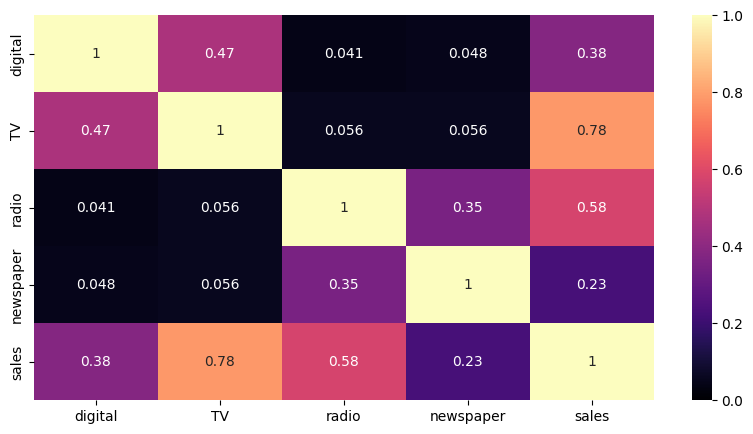

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(adv_df.corr(),annot=True,vmin=0,vmax=1,cmap='magma')

<Axes: xlabel='[digital]', ylabel='sales'>

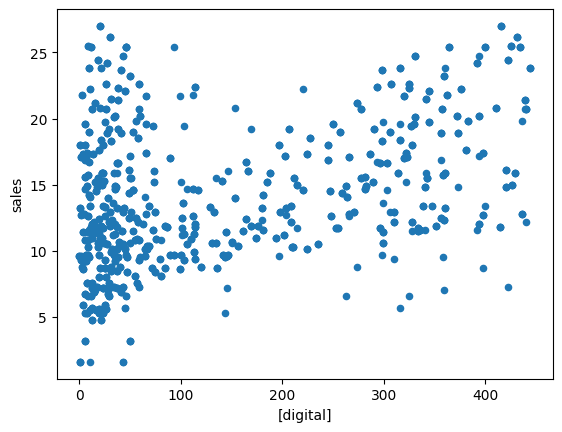

In [ ]:
adv_df.plot(kind='scatter', x=['digital'], y='sales')

<Axes: xlabel='[TV]', ylabel='sales'>

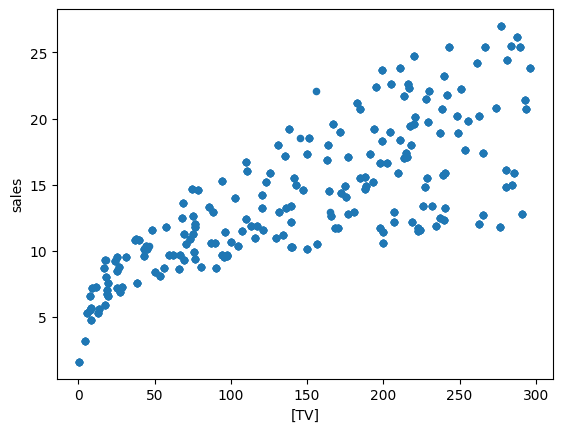

In [12]:
adv_df.plot(kind='scatter', x=['TV'], y='sales')

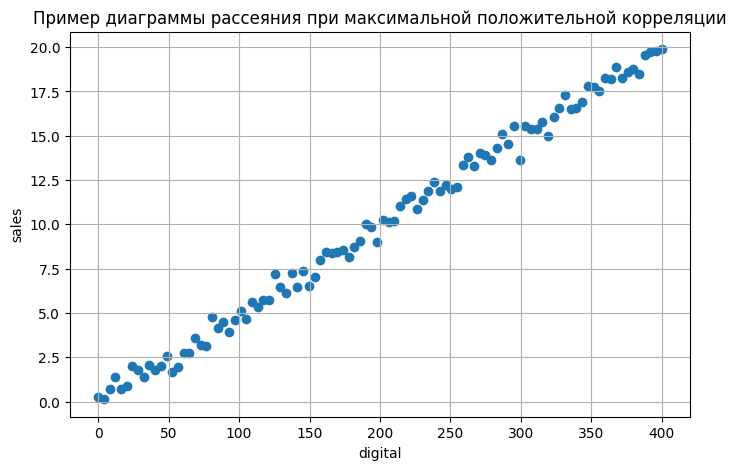

In [13]:
np.random.seed(42)
x = np.linspace(0, 400, 100)
y = x * 0.05 + np.random.normal(0, 0.5, 100)  # Малая случайная ошибка

plt.figure(figsize=(8,5))
plt.scatter(x, y)
plt.xlabel('digital')
plt.ylabel('sales')
plt.title('Пример диаграммы рассеяния при максимальной положительной корреляции')
plt.grid(True)
plt.show()

# Новый раздел

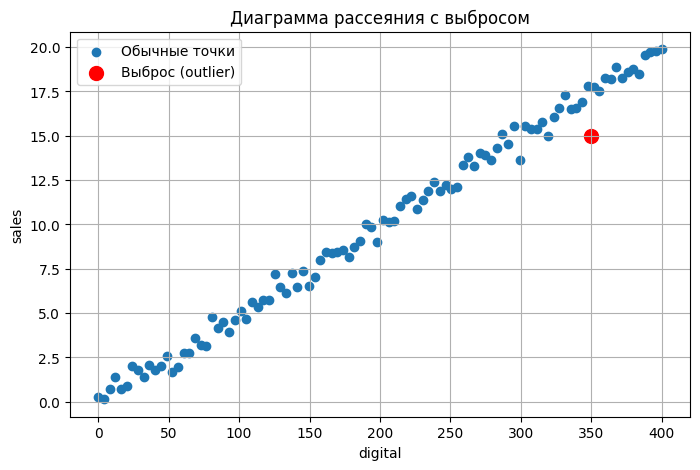

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Генерируем данные с сильной корреляцией
np.random.seed(42)
x = np.linspace(0, 400, 100)
y = x * 0.05 + np.random.normal(0, 0.5, 100)  # небольшие случайные шумы

# Добавляем выброс - точку далеко от основной группы
x_outlier = 350
y_outlier = 15

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label='Обычные точки')
plt.scatter(x_outlier, y_outlier, color='red', label='Выброс (outlier)', s=100)  # крупная красная точка
plt.xlabel('digital')
plt.ylabel('sales')
plt.title('Диаграмма рассеяния с выбросом')
plt.legend()
plt.grid(True)
plt.show()


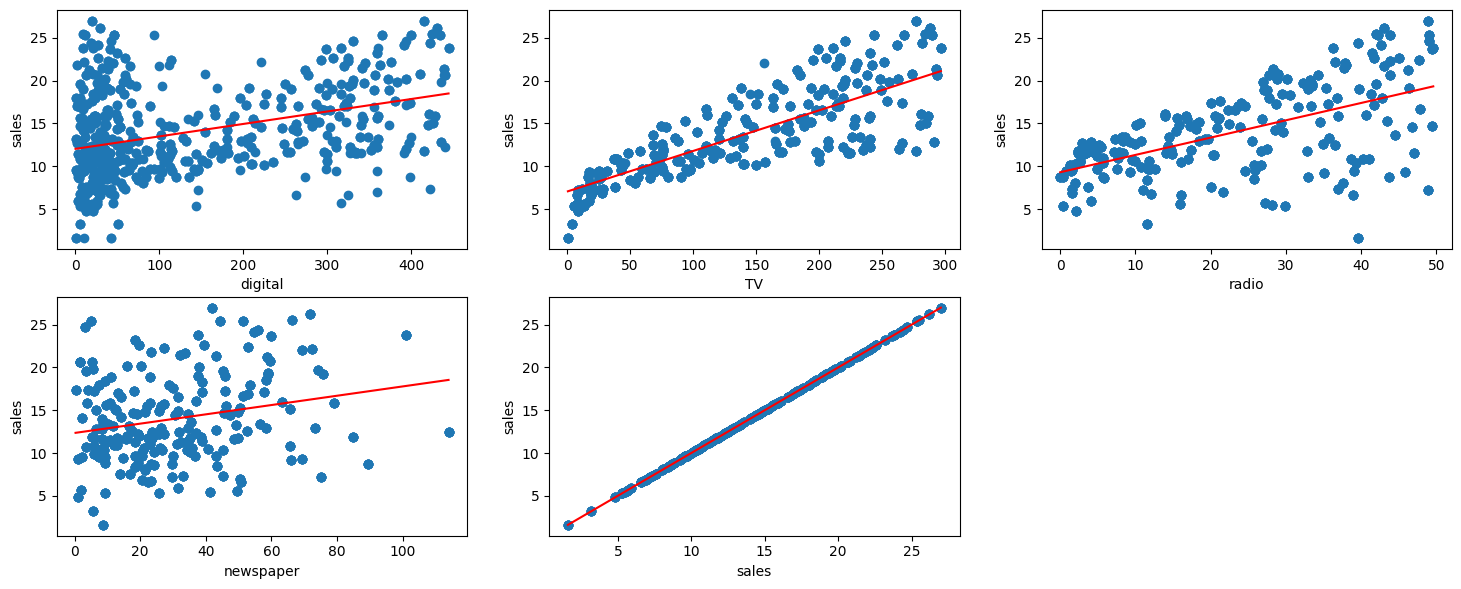

In [18]:
plt.figure(figsize=(18, 18))

for i, col in enumerate(adv_df.columns[0:13]): #iterates over all columns except for price column (last one)
    plt.subplot(5, 3, i+1) # each row three figure
    x = adv_df[col] #x-axis
    y = adv_df['sales'] #y-axis
    plt.plot(x, y, 'o')

    # Create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1)) (np.unique(x)), color='red')
    plt.xlabel(col) # x-label
    plt.ylabel('sales') # y-label

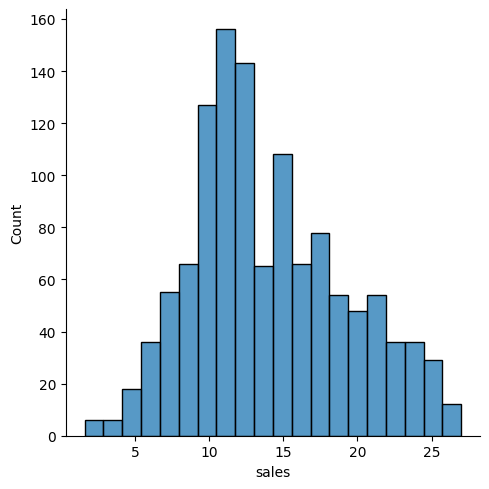

In [21]:
sns.displot(adv_df, x="sales")